<a href="https://colab.research.google.com/github/somkiatth/git/blob/master/kuseborn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 46 kB/s 
     |████████████████████████████████| 199 kB 52.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=2758890afadda9b0f49f404764d389965a3fffe43ea3c8f0a9a3cab10ca6ce35
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.getOrCreate()

In [8]:
schema = "total_bill float,	tip float,	sex string,	smoker string	,day string,	time string,	size int"

total_bill float,	tip float,	sex string,	smoker string	,day string,	time string,	size int

In [9]:
spdf=spark.read.csv("/content/tips.csv",header=True, schema=schema)

In [10]:
spdf.printSchema()

root
 |-- total_bill: float (nullable = true)
 |-- tip: float (nullable = true)
 |-- sex: string (nullable = true)
 |-- smoker: string (nullable = true)
 |-- day: string (nullable = true)
 |-- time: string (nullable = true)
 |-- size: integer (nullable = true)



In [16]:
spdf.show()

+----------+----+------+------+---+------+----+
|total_bill| tip|   sex|smoker|day|  time|size|
+----------+----+------+------+---+------+----+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|
|     25.29|4.71|  Male|    No|Sun|Dinner|   4|
|      8.77| 2.0|  Male|    No|Sun|Dinner|   2|
|     26.88|3.12|  Male|    No|Sun|Dinner|   4|
|     15.04|1.96|  Male|    No|Sun|Dinner|   2|
|     14.78|3.23|  Male|    No|Sun|Dinner|   2|
|     10.27|1.71|  Male|    No|Sun|Dinner|   2|
|     35.26| 5.0|Female|    No|Sun|Dinner|   4|
|     15.42|1.57|  Male|    No|Sun|Dinner|   2|
|     18.43| 3.0|  Male|    No|Sun|Dinner|   4|
|     14.83|3.02|Female|    No|Sun|Dinner|   2|
|     21.58|3.92|  Male|    No|Sun|Dinner|   2|
|     10.33|1.67|Female|    No|Sun|Dinner|   3|
|     16.29|3.71|  Male|    No|Sun|Dinne

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
pddf=spdf.toPandas()

In [24]:
pddf

,total_bill,tip,sex,smoker,day,time,size
0,16.990000,1.01,Female,No,Sun,Dinner,2
1,10.340000,1.66,Male,No,Sun,Dinner,3
2,21.010000,3.50,Male,No,Sun,Dinner,3
3,23.680000,3.31,Male,No,Sun,Dinner,2
4,24.590000,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.030001,5.92,Male,No,Sat,Dinner,3
240,27.180000,2.00,Female,Yes,Sat,Dinner,2
241,22.670000,2.00,Male,Yes,Sat,Dinner,2
242,17.820000,1.75,Male,No,Sat,Dinner,2


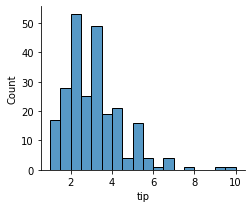

In [25]:
sns.displot(pddf.tip,height=3,aspect=1.2)

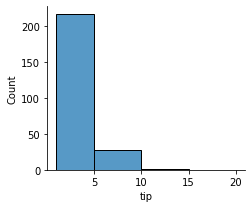

In [31]:
sns.displot(pddf.tip,bins=[1,5,10,15,20],height=3,aspect=1.2)

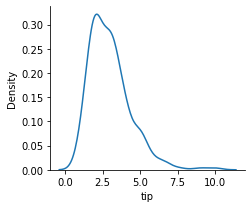

In [34]:
sns.displot(pddf.tip,kind='kde',height=3,aspect=1.2)

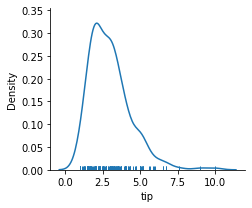

In [37]:
sns.displot(pddf.tip,kind='kde',rug=True,height=3,aspect=1.2)

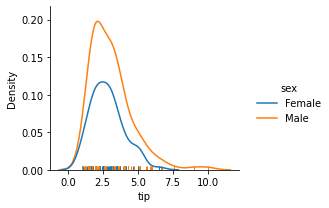

In [39]:
sns.displot(data=pddf, x='tip',hue='sex', kind='kde',rug=True,height=3,aspect=1.2)

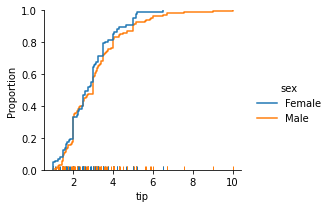

In [40]:
sns.displot(data=pddf, x='tip',hue='sex', kind='ecdf',rug=True,height=3,aspect=1.2)

ecdf  กราฟสะสม

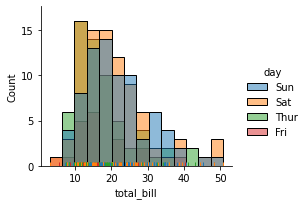

In [43]:
sns.displot(data=pddf, x='total_bill',hue='day', kind='hist',rug=True,height=3,aspect=1.2)

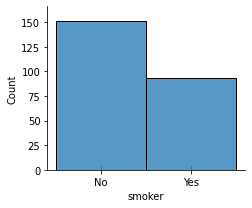

In [46]:
sns.displot(data=pddf, x='smoker', kind='hist',rug=True,height=3,aspect=1.2)

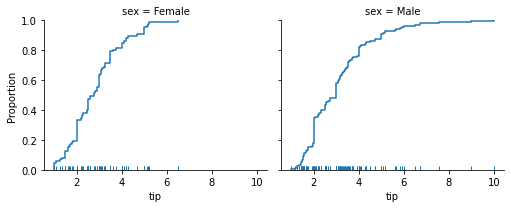

In [47]:
sns.displot(data=pddf, x='tip',col='sex', kind='ecdf',rug=True,height=3,aspect=1.2)

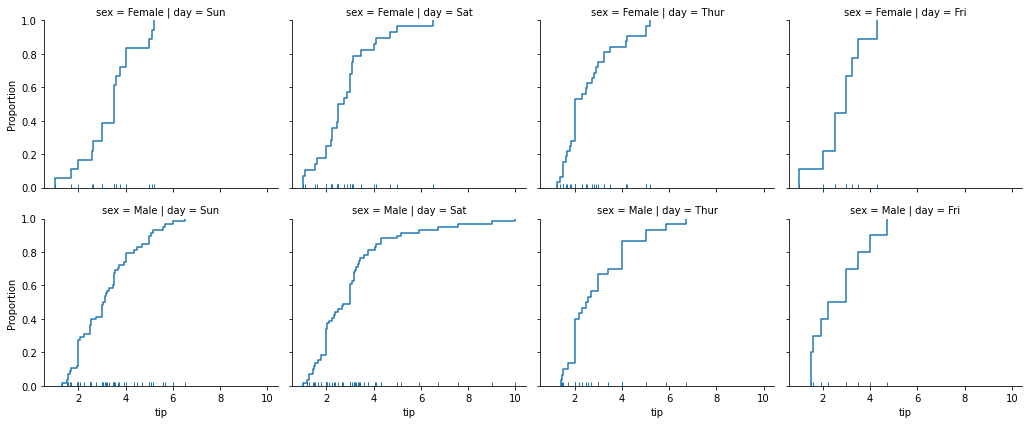

In [52]:
sns.displot(data=pddf, x='tip',row='sex',col='day', kind='ecdf',rug=True,height=3,aspect=1.2)

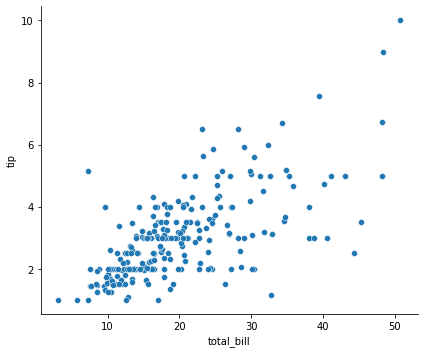

In [57]:
sns.relplot(data=pddf, x='total_bill',y='tip',kind='scatter',aspect=1.2)

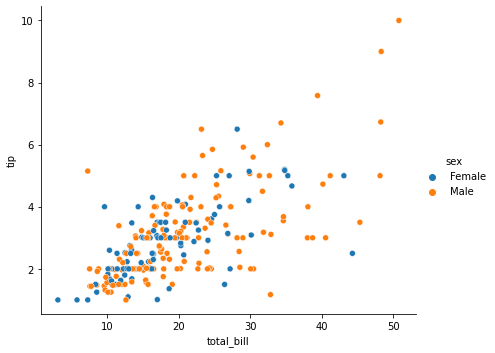

In [58]:
sns.relplot(data=pddf, x='total_bill',y='tip',kind='scatter',aspect=1.2,hue='sex')

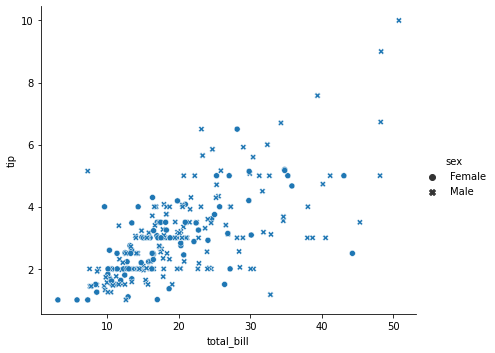

In [59]:
sns.relplot(data=pddf, x='total_bill',y='tip',kind='scatter',aspect=1.2, style='sex')

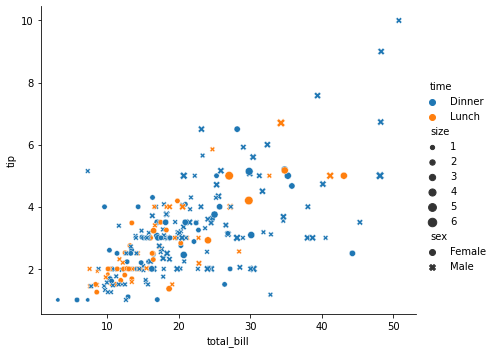

In [61]:
sns.relplot(data=pddf, x='total_bill',y='tip',kind='scatter',aspect=1.2, style='sex',hue='time',size='size')

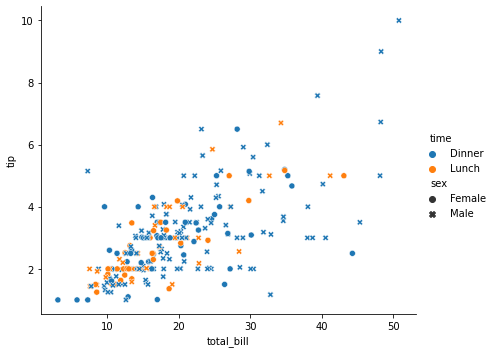

In [62]:
sns.relplot(data=pddf, x='total_bill',y='tip',kind='scatter',aspect=1.2, style='sex',hue='time')

In [65]:
print(pddf)

     total_bill   tip     sex smoker   day    time  size
0     16.990000  1.01  Female     No   Sun  Dinner     2
1     10.340000  1.66    Male     No   Sun  Dinner     3
2     21.010000  3.50    Male     No   Sun  Dinner     3
3     23.680000  3.31    Male     No   Sun  Dinner     2
4     24.590000  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239   29.030001  5.92    Male     No   Sat  Dinner     3
240   27.180000  2.00  Female    Yes   Sat  Dinner     2
241   22.670000  2.00    Male    Yes   Sat  Dinner     2
242   17.820000  1.75    Male     No   Sat  Dinner     2
243   18.780001  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [66]:
pddf

,total_bill,tip,sex,smoker,day,time,size
0,16.990000,1.01,Female,No,Sun,Dinner,2
1,10.340000,1.66,Male,No,Sun,Dinner,3
2,21.010000,3.50,Male,No,Sun,Dinner,3
3,23.680000,3.31,Male,No,Sun,Dinner,2
4,24.590000,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.030001,5.92,Male,No,Sat,Dinner,3
240,27.180000,2.00,Female,Yes,Sat,Dinner,2
241,22.670000,2.00,Male,Yes,Sat,Dinner,2
242,17.820000,1.75,Male,No,Sat,Dinner,2


In [67]:
eqdf =spark.read.csv("/content/earthquakes.csv",header=True)

In [68]:
eqdf.show()

+------------------+--------+---------+--------+---------+
|              Time|Latitude|Longitude|Depth/Km|Magnitude|
+------------------+--------+---------+--------+---------+
|2016-08-24 3:36:32| 42.6983|  13.2335|     8.1|        6|
|2016-08-24 3:37:27| 42.7123|  13.2533|       9|      4.5|
|2016-08-24 3:40:47| 42.7647|  13.1723|     9.7|      3.8|
|2016-08-24 3:41:39| 42.7803|  13.1683|     9.7|      3.9|
|2016-08-24 3:42:07| 42.7798|  13.1575|     9.7|      3.6|
|2016-08-24 3:43:59| 42.7298|  13.2137|    10.7|      3.4|
|2016-08-24 3:44:39|  42.676|  13.2858|    10.8|      2.7|
|2016-08-24 3:44:56| 42.6282|  13.2648|    10.6|      3.2|
|2016-08-24 3:46:12| 42.7645|  13.1777|     6.6|      3.7|
|2016-08-24 3:46:46| 42.7445|  13.2097|    12.4|      2.8|
|2016-08-24 3:47:52| 42.6675|  13.3238|     6.5|      3.3|
|2016-08-24 3:52:26| 42.7447|  13.2827|     7.9|      2.9|
|2016-08-24 3:52:43| 42.6378|  13.2313|    10.9|      3.1|
|2016-08-24 3:55:20| 42.7895|  13.1453|    11.1|        

In [69]:
from pyspark.sql import functions as F 

In [72]:
eqdf.select('Time',F.month(eqdf.Time)).show()

+------------------+-----------+
|              Time|month(Time)|
+------------------+-----------+
|2016-08-24 3:36:32|          8|
|2016-08-24 3:37:27|          8|
|2016-08-24 3:40:47|          8|
|2016-08-24 3:41:39|          8|
|2016-08-24 3:42:07|          8|
|2016-08-24 3:43:59|          8|
|2016-08-24 3:44:39|          8|
|2016-08-24 3:44:56|          8|
|2016-08-24 3:46:12|          8|
|2016-08-24 3:46:46|          8|
|2016-08-24 3:47:52|          8|
|2016-08-24 3:52:26|          8|
|2016-08-24 3:52:43|          8|
|2016-08-24 3:55:20|          8|
|2016-08-24 3:55:45|          8|
|2016-08-24 3:56:01|          8|
|2016-08-24 3:57:23|          8|
|2016-08-24 3:59:06|          8|
|2016-08-24 3:59:24|          8|
|2016-08-24 4:00:00|          8|
+------------------+-----------+
only showing top 20 rows



In [73]:
eqdf.withColumn('month',F.month(eqdf.Time)).show()

+------------------+--------+---------+--------+---------+-----+
|              Time|Latitude|Longitude|Depth/Km|Magnitude|month|
+------------------+--------+---------+--------+---------+-----+
|2016-08-24 3:36:32| 42.6983|  13.2335|     8.1|        6|    8|
|2016-08-24 3:37:27| 42.7123|  13.2533|       9|      4.5|    8|
|2016-08-24 3:40:47| 42.7647|  13.1723|     9.7|      3.8|    8|
|2016-08-24 3:41:39| 42.7803|  13.1683|     9.7|      3.9|    8|
|2016-08-24 3:42:07| 42.7798|  13.1575|     9.7|      3.6|    8|
|2016-08-24 3:43:59| 42.7298|  13.2137|    10.7|      3.4|    8|
|2016-08-24 3:44:39|  42.676|  13.2858|    10.8|      2.7|    8|
|2016-08-24 3:44:56| 42.6282|  13.2648|    10.6|      3.2|    8|
|2016-08-24 3:46:12| 42.7645|  13.1777|     6.6|      3.7|    8|
|2016-08-24 3:46:46| 42.7445|  13.2097|    12.4|      2.8|    8|
|2016-08-24 3:47:52| 42.6675|  13.3238|     6.5|      3.3|    8|
|2016-08-24 3:52:26| 42.7447|  13.2827|     7.9|      2.9|    8|
|2016-08-24 3:52:43| 42.6

In [75]:
eqdf.withColumn('month',F.month(eqdf.Time)).groupby('month').count().show()

+-----+-----+
|month|count|
+-----+-----+
|    9|  825|
|    8| 1421|
|   10| 2019|
|   11| 3821|
+-----+-----+



In [76]:
eqdf.withColumn('month',F.month(eqdf.Time)).groupby('month').count().sort('month').toPandas()

,month,count
0,8,1421
1,9,825
2,10,2019
3,11,3821


In [77]:
eqpddf = eqdf.withColumn('month',F.month(eqdf.Time)).groupby('month').count().sort('month').toPandas()

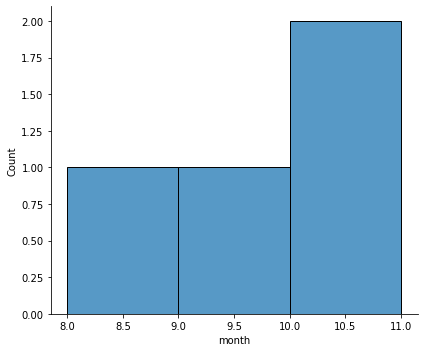

In [79]:
sns.displot(data=eqpddf, x='month', kind='hist',aspect=1.2)

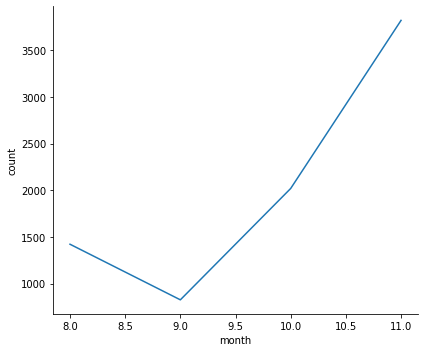

In [82]:
sns.relplot(data=eqpddf, x='month', y='count', kind='line',aspect=1.2)

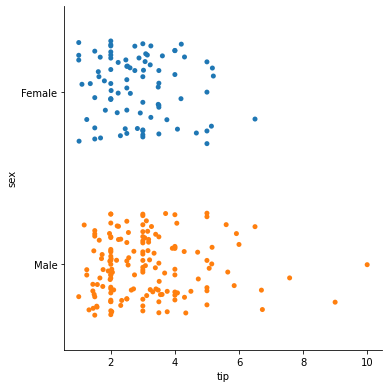

In [92]:
sns.catplot(data=pddf, x='tip', y='sex',kind='strip',height=5.5,jitter=.3)

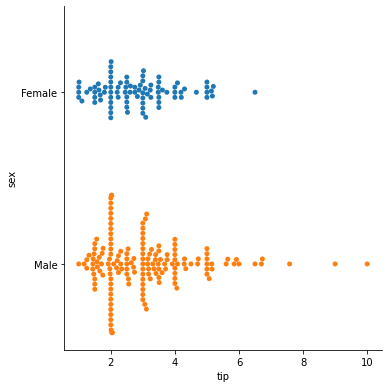

In [93]:
sns.catplot(data=pddf, x='tip', y='sex',kind='swarm',height=5.5)

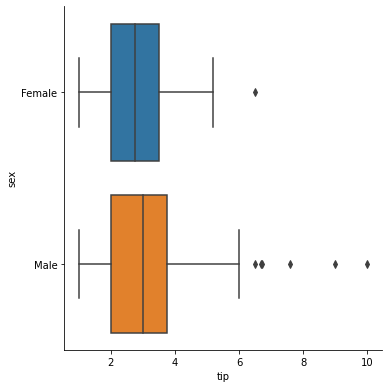

In [94]:
sns.catplot(data=pddf, x='tip', y='sex',kind='box',height=5.5)

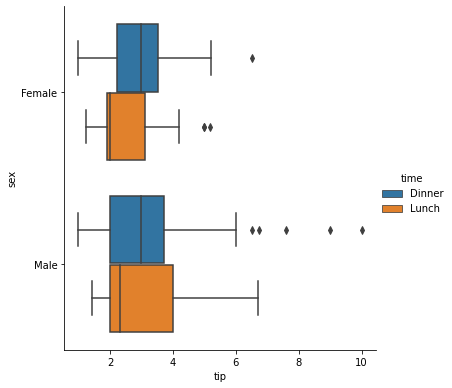

In [96]:
sns.catplot(data=pddf, x='tip', y='sex',kind='box',height=5.5 , hue='time')

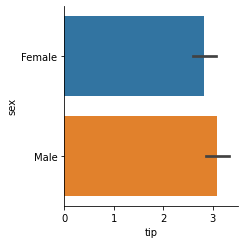

In [98]:
sns.catplot(data=pddf, x='tip', y='sex',kind='bar',height=3.5 )

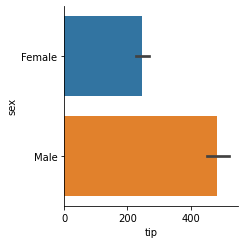

In [103]:
sns.catplot(data=pddf, x='tip', y='sex',kind='bar',height=3.5 ,estimator=sum)

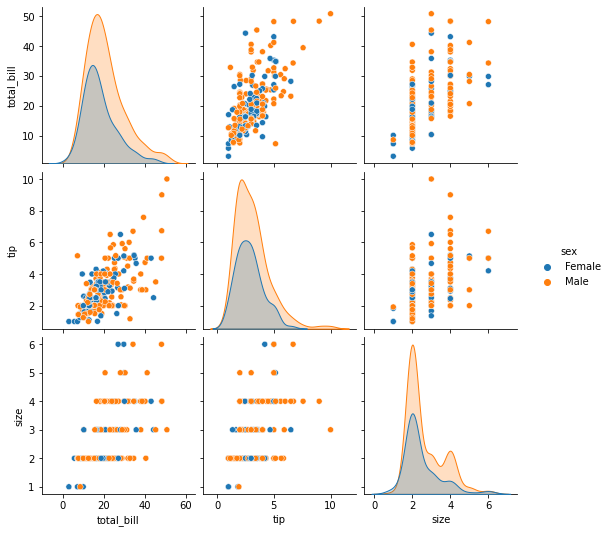

In [104]:
g=sns.pairplot(pddf,hue='sex')